## Problem Statment
Customer Segmentation Analysis:
Customer segmentation is the problem of uncovering information about a firm's customer base, based on their interactions with the business. In most cases this interaction is in terms of their purchase behavior and patterns. We explore some of the ways in which this can be used.

You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

In [68]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [69]:
df=pd.read_csv("Dataset/Mall_Customers.csv")

In [70]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Data Cleaning 

In [71]:
df.shape

(200, 5)

In [72]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [73]:
df.duplicated().sum()

0

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [75]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Data Visuliation & EDA

## Age Distribution Analysis

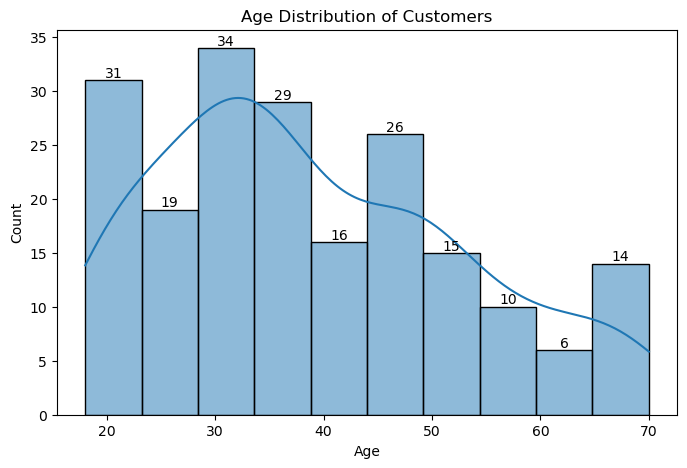

In [76]:
plt.figure(figsize=(8,5))
ax = sns.histplot(df['Age'], kde=True, bins=10)

# Bars par numbers show karna
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2,  # x position center
        height,                       # y position top of bar
        int(height),                  # show integer count
        ha='center', va='bottom', fontsize=10
    )

plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


### 📍 Conclusion (Easy Words)

- 👉 The mall mainly attracts young adults and working-age people, especially those around 30 years old  
- 👉 Senior citizens and teenagers form a much smaller part of the customer base  


## Spending Score vs Annual Income — Customer Behavior Groups

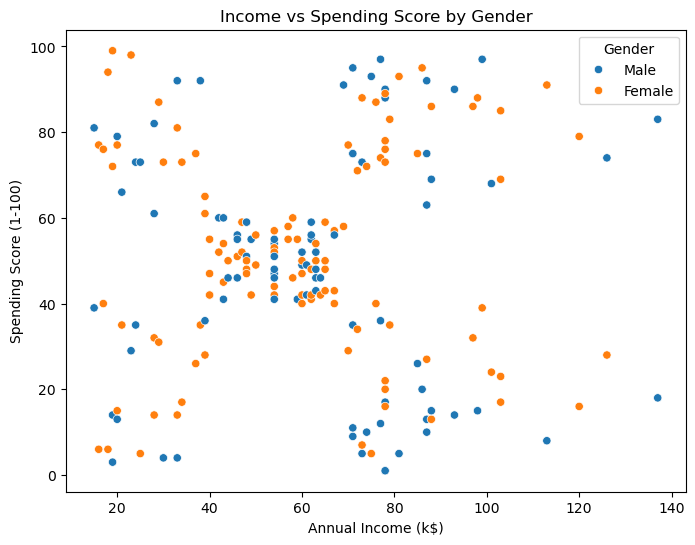

In [77]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Annual Income (k$)'],
                y=df['Spending Score (1-100)'],
                hue=df['Gender'])
plt.title("Income vs Spending Score by Gender")
plt.show()


### 📍 Conclusion

- 👉 Income does not guarantee higher spending  
- 👉 Some high-income customers are careful spenders  
- 👉 Some low-income customers spend more actively  
- 👉 Gender does not significantly affect shopping behavior in this dataset  


## Gender Proportion & Spending Behavior

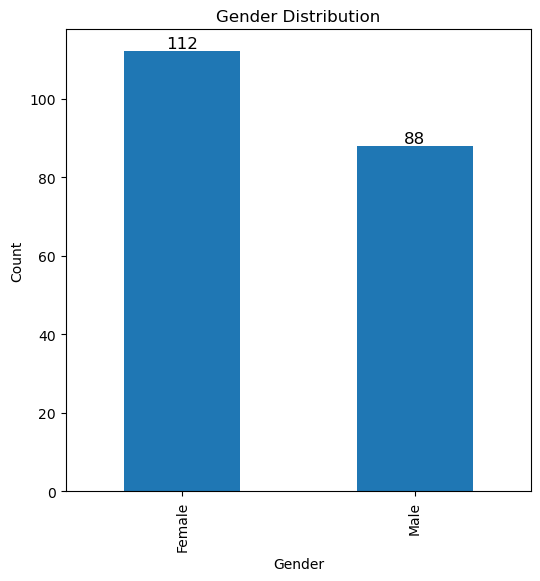

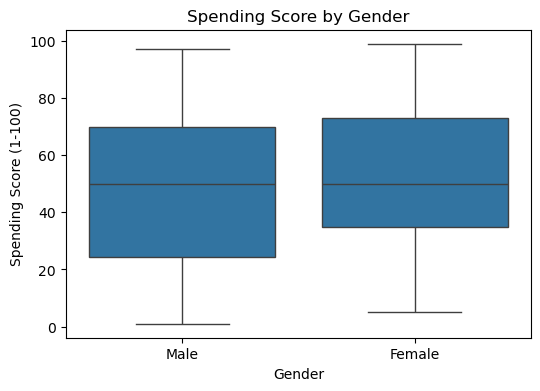

In [78]:
plt.figure(figsize=(6,6))
ax = df['Gender'].value_counts().plot(kind='bar')

# Numbers on top of bars
for p in ax.patches:
    ax.annotate(str(int(p.get_height())),
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha='center', va='bottom', fontsize=12)

plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df)
plt.title("Spending Score by Gender")
plt.show()


### 👥 Overall Gender-Based Insights

- 👩 **Females** → Higher spending & more variability  
- 👨 **Males** → Medium/low spending & more consistent behavior  


### ✍️ Easy Conclusion

- 👉 Females are more frequent and active shoppers  
- 👉 Males show comparatively lower and more stable spending scores  


## Correlation Heatmap — Feature Relationships

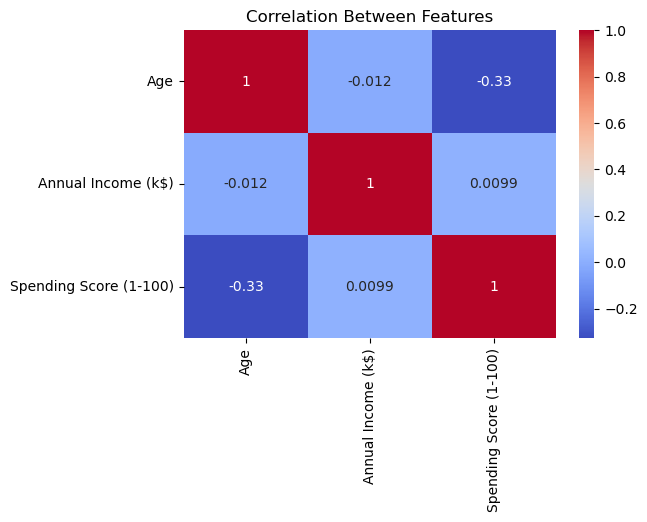

In [79]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['Age','Annual Income (k$)','Spending Score (1-100)']].corr(),
            annot=True, cmap='coolwarm')
plt.title("Correlation Between Features")
plt.show()


### 📊 Key Insights

- 💰 **Income and Spending Score are not strongly related**
  - Some high-income customers do not spend much
  - Some low-income customers spend a lot

- 👵 **As age increases, spending score slightly decreases**

- 📈 **Age does not determine income level in this dataset**


# Spending Score vs Age — Who spends more

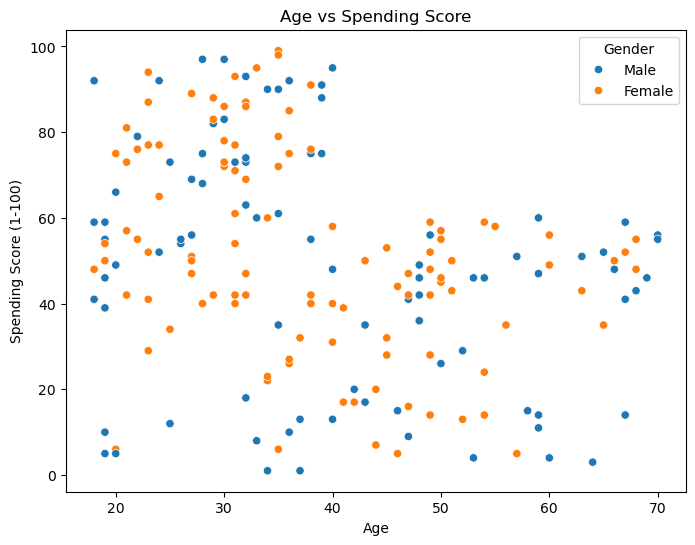

In [80]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Age'], y=df['Spending Score (1-100)'], hue=df['Gender'])
plt.title("Age vs Spending Score")
plt.show()


### 📌 Conclusion

- ✨ **Younger customers tend to spend more**  
- 👴 **Older customers show lower spending behavior**  
- 🚻 **Gender does not have a major impact on spending patterns**

Overall, age is a stronger factor in spending score than gender.


# Annual Income Distribution

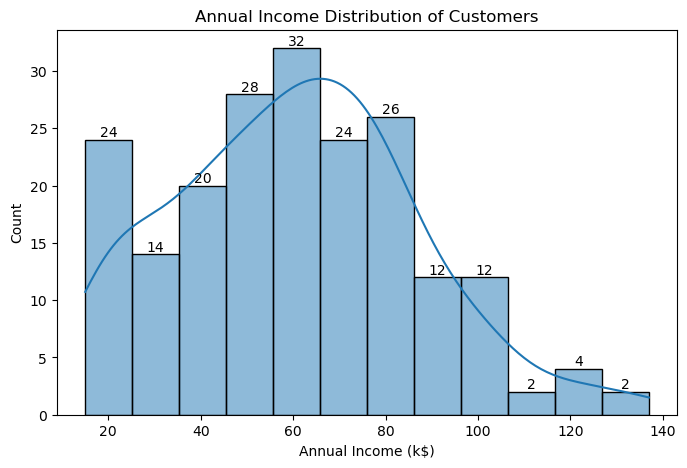

In [81]:
plt.figure(figsize=(8,5))
ax = sns.histplot(df['Annual Income (k$)'], kde=True, bins=12)

# Show numbers on bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2,
                height,
                int(height),
                ha='center', va='bottom', fontsize=10)

plt.title("Annual Income Distribution of Customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Count")
plt.show()



### 💵 Income Distribution Insights

- 📊 Most customers earn between **40k – 80k $**

- 💰 Very few customers earn **100k $ or more**

- 🧑‍🔧 Only a small number of customers have **below 30k $ income**

- 🏦 Very few customers are in the **highest income group (120k – 140k $)**

- 🔄 Income levels are **spread out** — customers do not have similar earnings


# Annual Income by Age Groups

C:\Users\utkar\AppData\Local\Temp\ipykernel_11404\870335574.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_income = df.groupby('Age Group')['Annual Income (k$)'].mean()


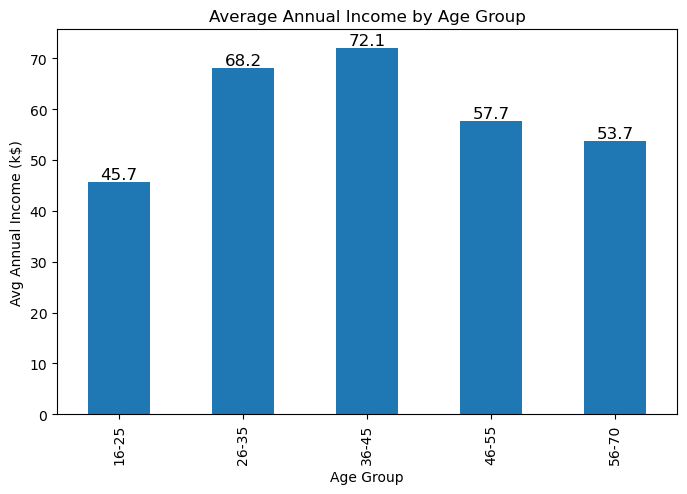

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

# Age grouping
df['Age Group'] = pd.cut(df['Age'], bins=[15,25,35,45,55,70],
                         labels=['16-25','26-35','36-45','46-55','56-70'])

# Average Income by Age Group
avg_income = df.groupby('Age Group')['Annual Income (k$)'].mean()

# Bar Plot
plt.figure(figsize=(8,5))
ax = avg_income.plot(kind='bar')

for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}",
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha='center', va='bottom', fontsize=12)

plt.title("Average Annual Income by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Avg Annual Income (k$)")
plt.show()


### 📊 Summary: Average Annual Income by Age Group

- 💼 **Age 36–45** → Highest income group on average  
- 🚀 **Age 26–35** → Second highest income, career growth stage  
- ⬇️ Income decreases **after age 45**  
  - Age 46–55 and 56–70 earn less than younger groups  
- 🎓 **Age 16–25** → Lowest income group (students / early career)  


### 🎯 Business Insight

People aged **26–45** are the best target for **premium products**,  
as they have higher income and better spending potential.


# Model Building

### Feature Selection & Scaling

In [83]:
from sklearn.preprocessing import StandardScaler

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]  # selected features

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


### Elbow Method → Best K choose karna

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

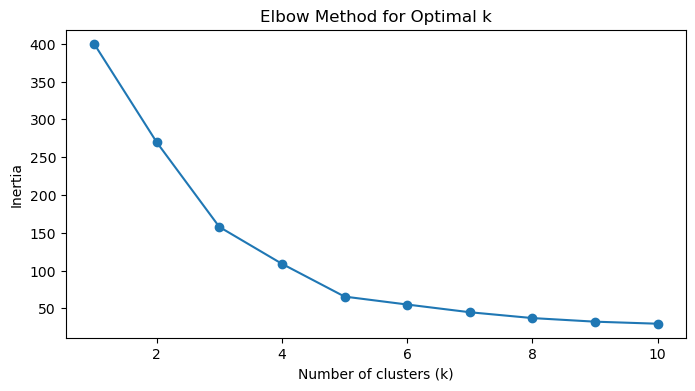

In [84]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(1,11)

for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=20)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(8,4))
plt.plot(K, inertia, '-o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


### 🔹 Optimal Cluster Selection

Using the **Elbow Method**, the optimal number of clusters was found to be:

- **k = 5**  

Reason:  
- Inertia (within-cluster sum of squares) **reduces significantly up to 5 clusters**  
- After k = 5, **marginal improvement becomes very small**, indicating diminishing returns


 ## Final K-Means Model Fit

In [85]:
k = 5
model = KMeans(n_clusters=k, random_state=42, n_init=20)
df['Cluster'] = model.fit_predict(X_scaled)

df.head()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age Group,Cluster
0,1,Male,19,15,39,16-25,4
1,2,Male,21,15,81,16-25,2
2,3,Female,20,16,6,16-25,4
3,4,Female,23,16,77,16-25,2
4,5,Female,31,17,40,26-35,4


 ## Visualize Clusters

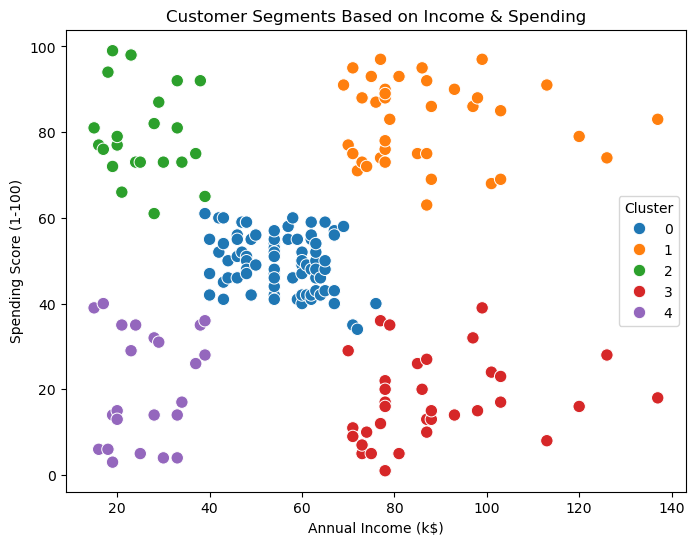

In [86]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Annual Income (k$)'], 
                y=df['Spending Score (1-100)'],
                hue=df['Cluster'],
                palette='tab10',
                s=80)
plt.title("Customer Segments Based on Income & Spending")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()


## Cluster Profiling (Business Insight)

In [87]:
cluster_profile = df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean().round(2)
print(cluster_profile)


         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                     55.30                   49.52
1                     86.54                   82.13
2                     25.73                   79.36
3                     88.20                   17.11
4                     26.30                   20.91


## Save Model and Scaler

In [88]:
import pickle

# Save the K-Means model
with open('kmeans_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Save the StandardScaler (very important because the training data was scaled)
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

print("Model and Scaler saved successfully.")


Model and Scaler saved successfully.
